## Минипроект по 3 уроку

### Задачи
- Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.  
- Какой клиент совершил больше всего успешных операций? (success == True)  
- С какой платформы осуществляется наибольшее количество успешных операций?  
- Какую платформу предпочитают премиумные клиенты?  
- Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)  
- Постройте график распределения числа успешных операций  
- Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
user_data = pd.read_csv('d://Carpov_Courses/projects/data_logs/user_data.csv')
logs = pd.read_csv('d://Carpov_Courses/projects/data_logs/logs.csv')

In [14]:
print('User_data: ',user_data.shape)
print('logs: ',logs.shape)

User_data:  (2954, 3)
logs:  (4500, 4)


In [15]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [16]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


Вопрос: Сколько уникальных значений принимает переменная platform?

In [43]:
logs['platform'].nunique()

3

In [17]:
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [18]:
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

Пропущенных нет

In [19]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [20]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания

In [60]:
logs.groupby('client').agg({'success': 'sum'})['success'].max()#определеили максимум успешных действий

41

In [61]:
logs.groupby('client', as_index=False) \
    .agg({'success': 'sum'}) \
    .query('success == 41')['client'].unique()#находим id тех у кого success = 41

array([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584],
      dtype=int64)

С какой платформы осуществляется наибольшее количество успешных операций?

In [67]:
logs.groupby('platform', as_index=False).agg({'success': 'sum'})

,platform,success
0,computer,1090
1,phone,2019
2,tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?

In [68]:
#Объединяем по inner
user_logs = user_data.merge(logs, on='client')

In [70]:
user_logs.query('premium == True').groupby('platform', as_index=False).agg({'client': 'count'})

,platform,client
0,computer,150
1,phone,246
2,tablet,24


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

Используйте датасэт, который вы получили на предыдущем шаге

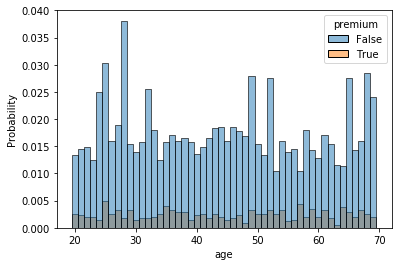

In [97]:
sns.histplot(user_logs, x='age', hue='premium', stat="probability", discrete=True)

Постройте график распределения числа успешных операций: 

x – число успешных операций  
y – число клиентов, совершивших столько успешных операций

In [105]:
user_logs.groupby('client',as_index=False).agg({'success':'count'})

,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2949,99926,1
2950,99927,1
2951,99931,1
2952,99952,1


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]

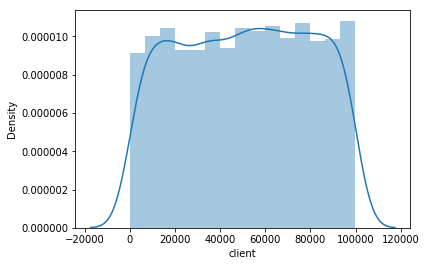

In [106]:
sns.distplot(user_logs.groupby('client',as_index=False).agg({'success':'count'}).client)

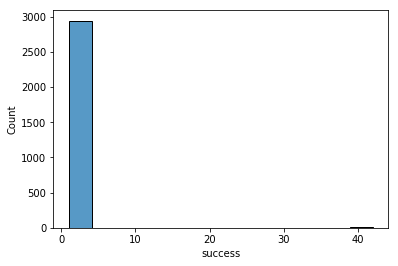

In [107]:
sns.histplot(user_logs.groupby('client',as_index=False).agg({'success':'count'}), x='success')

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [110]:
user_logs.groupby(['platform', 'age'], as_index=False).agg({'success': 'count'})

,platform,age,success
0,computer,20,19
1,computer,21,20
2,computer,22,12
3,computer,23,17
4,computer,24,28
...,...,...,...
143,tablet,65,1
144,tablet,66,4
145,tablet,67,6
146,tablet,68,2


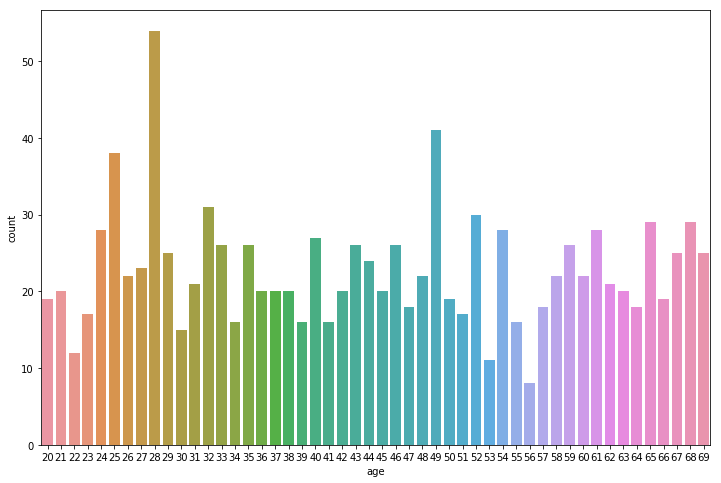

In [120]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data = user_logs.query('platform == "computer"'))